# Machine Learning 
## Vp Prediction with Ridge Regression

### General step:
- train and validate model in df_comp (well-ph1)
- test and predict Vp log in df_target (well-ph2)

In [25]:
#load library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#load data well-ph1
df_comp = pd.read_csv('ph1_complete.csv').set_index('DEPT')
df_comp = df_comp.drop(['FACIES'],axis = 1)
print(df_comp)

                  GR     RHOB          VP
DEPT                                     
4940.0460  150.07190  2.72833  3820.24268
4940.1984  153.27740  2.72637  3798.05396
4940.3508  155.58180  2.72202  3775.34277
4940.5032  155.97696  2.72029  3764.78662
4940.6556  153.99037  2.72137  3766.25977
...              ...      ...         ...
5009.3880   13.87138  2.48817  4883.83447
5009.5404   13.30794  2.48556  4878.48975
5009.6928   12.32699  2.48054  4870.06494
5009.8452   11.63948  2.47144  4847.33887
5009.9976   11.40202  2.46054  4809.12109

[460 rows x 3 columns]


In [26]:
#Split X (predictor) and y (target)
X = df_comp.drop(['VP'],axis = 1)
y = df_comp['VP']

print(X.head())
print(y.head())

                  GR     RHOB
DEPT                         
4940.0460  150.07190  2.72833
4940.1984  153.27740  2.72637
4940.3508  155.58180  2.72202
4940.5032  155.97696  2.72029
4940.6556  153.99037  2.72137
DEPT
4940.0460    3820.24268
4940.1984    3798.05396
4940.3508    3775.34277
4940.5032    3764.78662
4940.6556    3766.25977
Name: VP, dtype: float64


In [27]:
#standardizing data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler().fit(X)
X_std=sc.transform(X)


In [28]:
#train and test splitting
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X_std,y, test_size=0.2, random_state=22)


In [29]:
#Ridge Regression
from sklearn.linear_model import Ridge
reg = Ridge(0.5) #alpha  = 0.5


In [30]:
#fit and predict
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

In [31]:
#model performance evaluation

#MAPE = mean absolute percentage error
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape_train = mape(y_train, y_pred_train)
mape_val = mape(y_val,y_pred)

print('MAPE for train well is ' + str(mape_train))
print('MAPE for validation well is ' + str(mape_val))


MAPE for train well is 3.2646419292820785
MAPE for validation well is 2.745047166450493


In [32]:
#load well-ph2
df_target = pd.read_csv('ph2_target.csv').set_index('DEPT')

#define X (predictor) and y (target)
#y is used only for error calculation (not for fitting model)
X_test = df_target.drop(['VP'],axis = 1)
y = df_target.VP
print(X_test)

                 GR     RHOB
DEPT                        
4400.0928  51.31930  2.41280
4400.2452  51.53658  2.43140
4400.3976  48.50318  2.44562
4400.5500  42.97136  2.44510
4400.7024  36.64860  2.42774
...             ...      ...
4479.3408  96.83217  2.56725
4479.4932  95.38441  2.56478
4479.6456  95.31112  2.55866
4479.7980  96.32029  2.55041
4479.9504  98.59708  2.54491

[525 rows x 2 columns]


In [33]:
#standardizing data
sc=StandardScaler().fit(X_test)
X_test_std = sc.transform(X_test)

#prediction with previous model (model at well-ph1)
y_pred_test = reg.predict(X_test_std)

In [34]:
#performance evaluation
mape_test = mape(y,y_pred_test)
print('MAPE for test well is ' + str(mape_test))


MAPE for test well is 3.4732487944621213


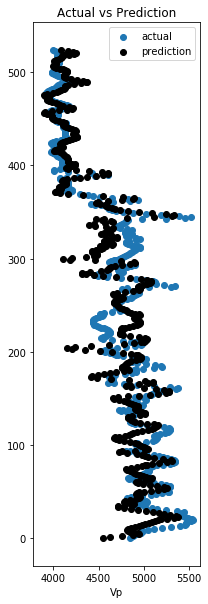

In [35]:
#simple plot actual vs prediction on test data (well-ph2)
plt.figure(figsize = (3,10))
plt.scatter(y,np.arange(0,len(df_target)),label = 'actual')
plt.scatter(y_pred_test,np.arange(0,len(df_target)),c= 'k', label = 'prediction')
plt.title('Actual vs Prediction')
plt.xlabel('Vp')
plt.legend()
plt.show()